# Classifying Handwritten Arabic Letters

In [40]:
import numpy as np
import pandas as pd
import scipy.ndimage
import matplotlib.pyplot as plt
from matplotlib import pyplot, image
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

For this project, I am exploring classification methods for this Kaggle dataset of handwritten Arabic letters obtained from Kaggle: https://www.kaggle.com/mloey1/ahcd1

Most of the projects on there use neural networks but I wanted to see what results you could get from classification methods learned in the class. 

In [129]:
df = pd.read_csv("train.csv")

## Looking at the data

In [130]:
len(df)

13439

In [136]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So here we have a dataset of 13439 Arabic characters, where each character is represented just as a 32x32 image array flattened into a single-row array. This is a total of 1024 pixels, where each one represents one of the 1024 pixels in the 32x32 array. The image is grayscale, so each pixel is merely represented as a single value between 0 and 255 (compared to colored images where each pixel is associated with three or four 256-bit values), where the color lies on a gradient with 0 as white and 255 as black.  

Sounds like a lot but fortunately Scipy comes with a lot of features that can easily work with image data. Here we can plot a random letter from the dataset with Matplotlib:

In [132]:
def display_letter(letter):
    image_array = np.array(letter).reshape(32,32)
    rotated_image = scipy.ndimage.rotate(image_array,90)
    plt.imshow(rotated_image, origin="lower")

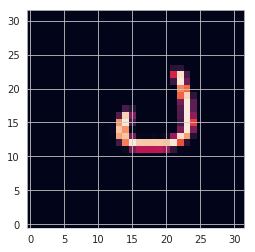

In [133]:
letter = df[6005:6006] # random letter
display_letter(letter)

What classification method can we choose? Here I am using the support vector machine (SVM) to classify them. Why? Other than CNNs, SVMs are usually one of the best models for image classification. They also won't really mind our large feature space (1024) because of the kernel trick, so tends to be faster than something like random forest.

We learned in class, but to reiterate, the SVM is a model that operates by separating classes by creating a decision boundary that has the maximum possible margin between our two classes of points. A decision boundary can be represented as wx + b = 0, where w is a weight vector normal to our hyperplane, x is our vector of dependent variables, and b is just the constant. A margin for a point will then be defined as y_i(wx_i + b) and can be thought of as the distance from a given point to the center of our road. We'll call this margin gamma_i. The goal here is a Lagrange optimization that minimizes the norm of w subject to y_i(w^Tx_i + b) > 1 for all i.

## Fitting the model

Loading in the training labels:

In [134]:
labels = pd.read_csv("label.csv")

First tried fitting an SVM with pretty random parameters:

In [98]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(C=0.05)
classifier.fit(df, labels)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=0.05, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Here is the test data that they provided. We will use it to get an accuracy score for our classifier. The accuracy metric here is simply the percent of correctly classified points.

In [99]:
test = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_label.csv")

In [100]:
predictions = classifier.predict(test)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(test_labels, predictions))

0.19648704971717773


About a 20% correct classification rate. Pretty bad, but for 28 possible classes, at least it's making some decent guesses here and there. 

The model could use better parameters. I used K-fold cross-validation to try and find better hyperparameters. The SVM has two parameters that you can adjust. In Python, they are called 'C' and 'gamma'.

I originally set that the SVM makes a linearly separable hyperplane but this isn't actually the case. Most real-life scenarios will not be linearly separable and to do so would be overfitting. It uses slack variables to determines how egregiously a point has been misclassified. The parameter C is the penalty that dictates how egregiously the SVM is allowed to misclassify points. (ie, instead of drawing a road that separates our trees at all costs, the slack variables allow a couple trees to be bulldozer if it allows us a reasonably wider road). 

That part took a while so it's omitted, but ultimately found that the SVM seems to like C values around 1 the best, and worked best just using its automatically calculated best gamma value.

In [ ]:
from sklearn import svm, grid_search

def svc_param_selection(X, y, nfolds):
    Cs = [0.0001, 0.001, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

svc_param_selection(df, labels, 5)

Trying with better C value:

In [102]:
classifier = svm.SVC(C=1, kernel='linear')

In [103]:
classifier.fit(df, labels)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Trying with the test data again:

In [104]:
test = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_label.csv")

In [105]:
predictions = classifier.predict(test)
print(accuracy_score(test_labels, predictions))

0.423340279845192


Some improvement. One way to see how we can improve further is to check the confusion matrix to see if we can at least find out what the model gets stuck on. 

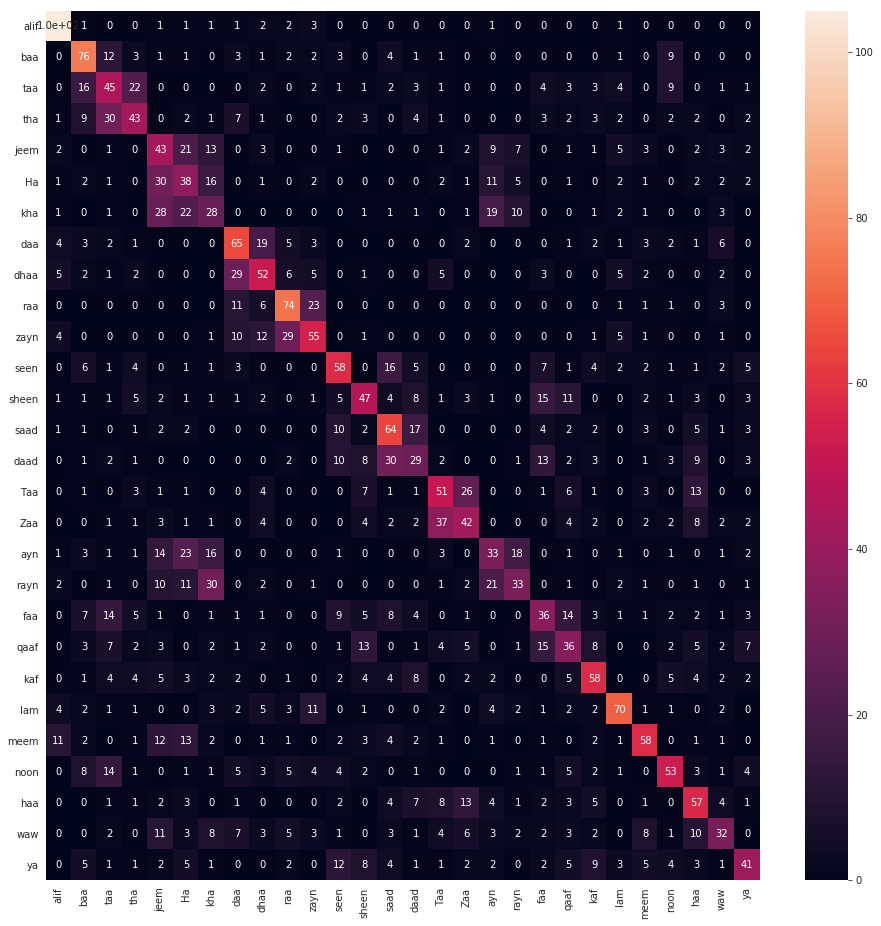

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

letter_names = ["alif", "baa", "taa", "tha", "jeem", "Ha", "kha", "daa", "dhaa", "raa", "zayn", "seen", "sheen",
               "saad", "daad", "Taa", "Zaa", "ayn", "rayn", "faa",  "qaaf", "kaf", "lam", "meem", "noon", "haa",
               "waw", "ya"]

plt.figure(figsize=(16,16))
sns.heatmap(confusion_matrix(test_labels, predictions),annot=True,
           xticklabels=letter_names, yticklabels=letter_names)


So looking at the confusion matrix, notice how it seems to cluster into groups. This is actually a good thing, because if you know the Arabic alphabet, there are 'groups' of letters that have the same base strokes but only differ by the number of dots present. Here's an example of what I mean:

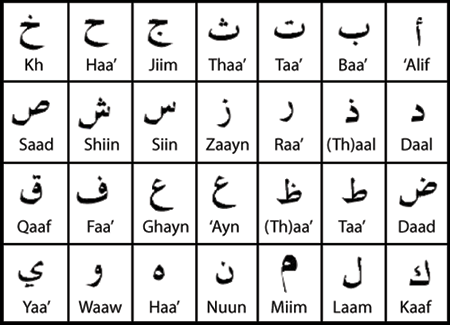

In [119]:
from IPython.display import Image
Image(filename='letters.gif') 

So the model is actually very good at defining the group of letter, but it gets stuck at guessing the number of dots the character has. That will be the key to getting a better classification rate.

## Next steps?

For SVMs, because it is a pretty simple classifier, the key to getting good results for image classification is pre-processing the data in such a way to get our kernel to be nicely linearly separate the data. A specific method that's cool that I saw in this paper (https://csce.ucmss.com/cr/books/2018/LFS/CSREA2018/IPC3188.pdf) which is to first classify the letter into its 'group' of similar letters (ie, group 1 would be 'Alif', group 2 would be 'Baa', 'Taa', and 'Thaa', group 3 would be 'Jeem', 'Haa', and 'Khaa', and so on), and then once its determined the base strokes, use a more concentrated method to identify the dots or holes.

## Trying the classifier

Just as a nice sanity check, I drew a letter on a piece of paper, took a picture of it on my phone, and then sent it to my computer to be used in the classifier. You can do it by saving your picture as a .tif image, where it can be easily transformed into the 32x32 format by the Skimage library.

In [137]:
from skimage import io
import skimage.transform
from skimage import img_as_ubyte
import collections


def plot_letter(filename):
    im = io.imread("my_letter.tif")
    print ( plt.imshow(im) )
    
def plot_processed_letter(filename):
    im = io.imread("my_letter.tif",  as_gray=True)
    x = img_as_ubyte(skimage.transform.resize(im, (32, 32)))
    x = np.invert(x)
    print ( plt.imshow(x) )
    
def guess_letter(filename):
    im = io.imread("my_letter.tif",  as_gray=True)
    x = img_as_ubyte(skimage.transform.resize(im, (32, 32)))
    x = np.invert(x)
    def flatten(x):
        if isinstance(x, collections.Iterable):
            return [a for i in x for a in flatten(i)]
        else:
            return [x]
    prediction = classifier.predict([flatten(x)])[0]
    return letter_names[prediction]

Here is my 'qaf' that I drew:

AxesImage(54,36;334.8x217.44)


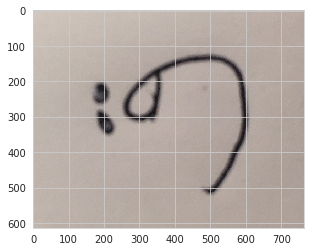

In [127]:
plot_letter("my_letter.tif")

Here is what the model sees:

AxesImage(54,36;334.8x217.44)


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


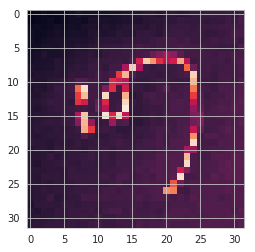

In [138]:
plot_processed_letter("my_letter.tif")

And here is what the model guesses:

In [116]:
guess_letter("my_letter.tif")

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


'faa'

Sadly the model guessed 'faa'. Almost correct, but 'faa' has one dot while 'qaf' has two dots.